In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector

In [3]:
from optimizers import scipy_bfgs, scipy_nelder_mead, scipy_trust_ncg


In [4]:
def benchmark_ellipsoid(minimize, x0, alpha=10000, callback=None):
    def arg1(x):
        return Ellipsoid.f(x, alpha=alpha)
    def arg2(x):
        return Ellipsoid.gradient(x, alpha=alpha)
    return minimize(arg1, x0, arg2, callback=callback)


def benchmark_rosenbrock(minimize, x0, callback=None):
    return minimize(
        lambda x: Rosenbrock.f(
            x), x0, Rosenbrock.gradient, callback=callback
    )


def benchmark_log_ellipsoid(minimize, x0, epsilon=0.0001, alpha=10000, callback=None):
    return minimize(
        lambda x: LogEllipsoid.f(
            x, alpha=alpha, epsilon=epsilon),
        x0,
        lambda x: LogEllipsoid.gradient(
            x, alpha=alpha, epsilon=epsilon),
        callback=callback
    )


def benchmark_attractive_sector(minimize, x0, q=10000, callback=None):
    return minimize(
        lambda x: AttractiveSector.f(
            x, q=q
        ),
        x0,
        lambda x: AttractiveSector.gradient(
            x, q=q
        ),
        callback=callback
    )


def benchmark_sum_of_different_powers(minimize, x0, callback=None):
    return minimize(
        lambda x: SumOfDifferentPowers.f(
            x
        ),
        x0,
        lambda x: SumOfDifferentPowers.gradient(
            x
        ),
        callback=callback
    )


In [5]:
def collect_gradients(arr, grad):
    def inner_func(xk):
        arr.append(np.linalg.norm(grad(xk)))
        return False
    return inner_func
def collect_function_values(arr, f):
    def inner_func(xk):
        arr.append(f(xk))
        return False
    return inner_func

In [6]:
def plot_gradients(g1, g2, g3):
    fig = plt.figure()
    plt.plot(g1, label='BFGS')
    plt.plot(g2, label='NelderMead')
    plt.plot(g3)
    plt.xlabel('iterations')
    plt.ylabel('gradient norm')
    plt.legend()
    fig.show()

def plot_function_values(f1, f2, f3):
    fig = plt.figure()
    plt.plot(f1, label='BFGS')
    plt.plot(f2, label='NelderMead')
    plt.plot(f3)
    plt.xlabel('iterations')
    plt.ylabel('function value')
    plt.legend()
    fig.show()

/tmp/ipykernel_14424/834351303.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


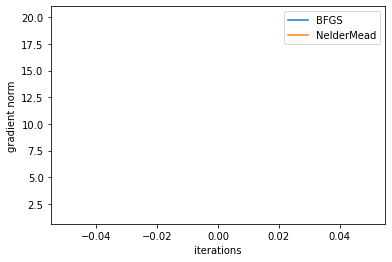

In [7]:
gradients = []
benchmark_ellipsoid(scipy_bfgs.ScipyBFGS.minimize, np.array([1,1]), callback=collect_gradients(gradients, Ellipsoid.gradient))
plot_gradients(gradients[0], gradients[1], gradients[2])

In [8]:
bfgs_g, nelder_mead_g, trust_ncg_g = [], [], []
bfgs, nelder_mead, trust_ncg = [], [], []
benchmark_log_ellipsoid(scipy_bfgs.ScipyBFGS.minimize, np.array([1,1,1,1,1]), callback=collect_gradients(bfgs_g, LogEllipsoid.gradient))
benchmark_log_ellipsoid(scipy_nelder_mead.ScipyNelderMead.minimize, np.array([1,1,1,1,1]), callback=collect_gradients(nelder_mead_g, LogEllipsoid.gradient))
#benchmark_log_ellipsoid(scipy_trust_ncg.ScipyTrustNCG.minimize, np.array([1,1,1,1,1]), callback=collect_gradients(trust_ncg_g, LogEllipsoid.gradient))
benchmark_log_ellipsoid(scipy_bfgs.ScipyBFGS.minimize, np.array([1,1,1,1,1]), callback=collect_function_values(bfgs, LogEllipsoid.f))
benchmark_log_ellipsoid(scipy_nelder_mead.ScipyNelderMead.minimize, np.array([1,1,1,1,1]), callback=collect_function_values(nelder_mead, LogEllipsoid.f))
#benchmark_log_ellipsoid(scipy_trust_ncg.ScipyTrustNCG.minimize, np.array([1,1,1,1,1]), callback=collect_function_values(trust_ncg, LogEllipsoid.f))

/home/rasmuslovstad/Programs/assignments/num-opt/venv/lib/python3.10/site-packages/scipy/optimize/_minimize.py:542: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


(array([-3.99565322e-05, -6.76349502e-07, -2.52156184e-06, -6.15291924e-07,
         1.07054779e-07]),
 406,
 array([ -0.79910883,  -0.13526621,  -5.04298599, -12.30550252,
         21.41037127]))

/tmp/ipykernel_14424/834351303.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


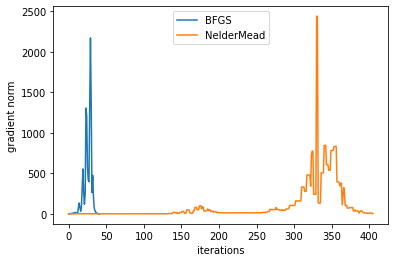

In [9]:
plot_gradients(bfgs_g, nelder_mead_g, trust_ncg_g)

/tmp/ipykernel_14424/834351303.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


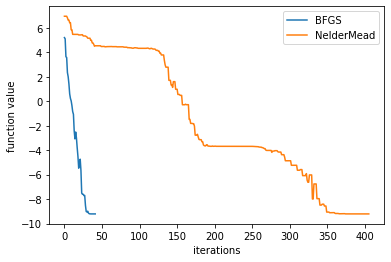

In [10]:
plot_function_values(bfgs, nelder_mead, trust_ncg)

/home/rasmuslovstad/Programs/assignments/num-opt/venv/lib/python3.10/site-packages/scipy/optimize/_minimize.py:542: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
/home/rasmuslovstad/Programs/assignments/num-opt/venv/lib/python3.10/site-packages/scipy/optimize/_minimize.py:542: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
/tmp/ipykernel_14424/834351303.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_14424/834351303.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


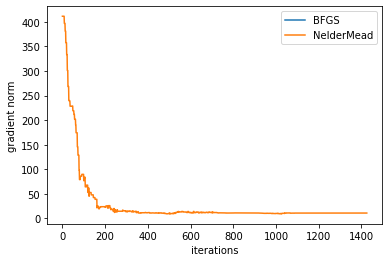

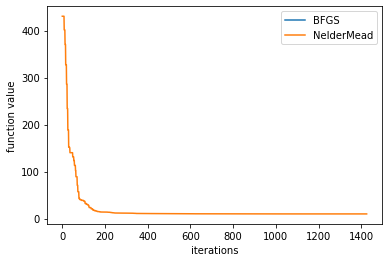

In [19]:
bfgs_g, nelder_mead_g, trust_ncg_g = [], [], []
bfgs, nelder_mead, trust_ncg = [], [], []
q = 10000
x0 = [-0.98552033, 1.2647466, -0.4067498, -1.85682861, -0.50766255, 0.90266863,
  0.71499435,1.96419219, 0.38214349, 0.65989964]
benchmark_attractive_sector(scipy_bfgs.ScipyBFGS.minimize, x0, callback=collect_gradients(bfgs_g, AttractiveSector.gradient), q=q)
benchmark_attractive_sector(scipy_nelder_mead.ScipyNelderMead.minimize, x0, callback=collect_gradients(nelder_mead_g, AttractiveSector.gradient), q=q)
benchmark_attractive_sector(scipy_bfgs.ScipyBFGS.minimize, x0, callback=collect_function_values(bfgs, AttractiveSector.f), q=q)
benchmark_attractive_sector(scipy_nelder_mead.ScipyNelderMead.minimize, x0, callback=collect_function_values(nelder_mead, AttractiveSector.f), q=q)
#plot_gradients(bfgs_g, nelder_mead_g, trust_ncg_g)
plot_gradients(bfgs_g, nelder_mead_g, [])
plot_function_values(bfgs, nelder_mead, [])
#plot_function_values(bfgs, nelder_mead, trust_ncg)

In [16]:
bfgs_g

[]

In [12]:
bfgs, nelder_mead, trust_ncg = [], [], []
benchmark_log_ellipsoid(scipy_bfgs.minimize, np.array([1,1,1,1,1]), callback=collect_gradients(bfgs, LogEllipsoid.gradient))
benchmark_log_ellipsoid(scipy_nelder_mead.minimize, np.array([1,1,1,1,1]), callback=collect_gradients(nelder_mead, LogEllipsoid.gradient))
benchmark_log_ellipsoid(scipy_trust_ncg.minimize, np.array([1,1,1,1,1]), callback=collect_gradients(trust_ncg, LogEllipsoid.gradient))
plot_gradients(bfgs, nelder_mead, trust_ncg)

TypeError: benchmark_log_ellipsoid.<locals>.<lambda>() takes 1 positional argument but 2 were given

In [ ]:
def evaluate_algorithms(benchmark_func, benchmark_grad, x0s):
    bfgs_total, nelder_mead_total, trust_ncg_total = [], [], []
    for x0 in tqdm(x0s):
        bfgs, nelder_mead, trust_ncg = [], [], []
        benchmark_func(scipy_bfgs.minimize, x0, callback=collect_gradients(bfgs, benchmark_grad))
        benchmark_func(scipy_nelder_mead.minimize, x0, callback=collect_gradients(nelder_mead, benchmark_grad))
        benchmark_func(scipy_trust_ncg.minimize, x0, callback=collect_gradients(trust_ncg, benchmark_grad))
        bfgs_total.append(bfgs)
        nelder_mead_total.append(nelder_mead)
        trust_ncg_total.append(trust_ncg)
    return np.mean(bfgs_total), np.mean(nelder_mead_total), np.mean(trust_ncg_total)

In [ ]:
# 4: How many iterations does it take before the algorithm converges? (Efficiency)
#ds = [2, 3, 4, 10, 30]
ds = [2,3]
n = 100
x0s = []
for d in ds:
    x0s.append(np.zeros(d))
    for i in range(0, n):
        # Add random points with each coordinate in [-2, 2]
        x0s.append((np.random.rand(d) - 0.5)*4)
mean_gradient_norms = evaluate_algorithms(benchmark_log_ellipsoid, LogEllipsoid.gradient, x0s)

In [ ]:
scipy_bfgs.minimize